In [1]:
#pip install eli5

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer

from sklearn import metrics
from sklearn.metrics import classification_report, f1_score
#from cm import plot_confusion_matrix
#from ds_utils.metrics import plot_confusion_matrix

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

import eli5

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Logistic Regression Analyses

In [4]:
wvs_w6 = pd.read_csv('../data/Evaluating_Happiness/w6_modeling.csv', low_memory=False)
wvs_w6.head()

,v2,country,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v24,v25,v26,v27,v30,v32,v33,v34,v44,v45,v47,v48,v49,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74r,v75,v76,v77,v78,v79,v80,v82,v83,v84,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v113,v114,v115,v116,v117,v119,v120,v121,v122,v123,v124,v126,v131,v132,v133,v134,v135,v136,v137,v138,v139,v140,v143,v144g,v147,v150,v151,v152,v153,v154,v155,v170,v171,v173,v174,v176,v177,v179,v180,v181,v182,v183,v184,v187,v188,v189,v190,v191,v192,v193,v194,v195,v196,v197,v198,v199,v200,v202,v203,v204,v205,v207,v208,v209,v210,v211,v213,v214,v216,v225,v229,v237,v238,v239,v240,v242,v242g,v248,v258,s018,s019,v262
0,12,ALG,1,1,1,3,1,1,2,1,1,1,2,2,2,2,2,2,2,1,2,2,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,7,4,6,0,10,2,3,1,3,3,1,1,1,1,1,1,1,1,1,1,2,1,2,3,3,2,2,2,4,8,7,6,8,7,5,2,2,2,2,2,2,1,3,3,2,2,2,4,3,3,3,2,3,4,4,3,4,3,8,5,6,9,3,4,7,6,7,2,5,1,1,1,10,1,2,2,2,2,2,2,5,5,5,1,2,2,3,2,2,3,3,3,3,7,8,3,5,6,9,6,6,1,1,1,1,3,1,6,5,1,1,2,2,2,2,6,1,4,5,1,21,1,7,1.0,0.833333,1.25,2014
1,12,ALG,1,2,3,4,2,2,2,2,2,1,2,2,2,2,2,2,2,1,2,1,0,0,0,0,0,0,0,2,1,1,1,2,1,2,3,2,6,8,6,0,10,2,1,2,3,4,3,1,1,1,2,2,3,2,1,1,3,2,2,2,2,2,1,2,3,7,5,5,4,4,6,1,3,3,3,3,3,1,1,1,2,3,1,2,2,3,2,2,3,2,2,3,3,2,8,8,8,9,2,6,4,2,4,1,5,1,2,1,10,1,1,1,2,1,2,2,5,5,1,5,2,3,4,2,2,2,2,2,2,4,8,4,6,4,8,3,4,7,1,1,1,1,1,3,5,1,2,2,2,2,3,6,2,3,6,2,24,1,7,1.0,0.833333,1.25,2014
2,12,ALG,1,3,2,4,2,1,2,2,2,2,2,1,2,1,2,1,2,1,2,1,0,0,0,0,0,0,0,2,1,2,3,1,1,1,1,1,6,8,6,0,6,2,4,1,2,1,4,1,2,2,2,1,2,1,1,4,1,2,2,2,2,2,2,2,2,7,7,7,5,7,5,1,3,3,4,4,4,3,2,2,2,4,3,2,2,2,4,3,2,3,2,4,2,2,7,4,8,3,3,6,9,5,6,1,5,1,2,1,6,2,3,1,2,2,3,3,5,5,5,5,2,3,2,3,2,3,3,3,3,4,7,5,5,5,5,5,5,1,1,1,1,4,1,4,5,1,1,3,2,4,2,3,1,4,6,2,26,2,5,1.0,0.833333,1.25,2014
3,12,ALG,1,1,3,4,3,1,2,1,2,2,2,2,1,2,2,2,1,1,2,2,0,0,0,0,0,0,0,2,2,1,1,1,2,2,2,2,6,8,6,0,6,2,1,3,1,4,3,1,1,1,1,1,2,3,2,3,1,1,2,2,3,1,2,2,2,9,5,6,4,6,8,1,3,3,2,2,3,2,3,4,2,4,2,3,3,4,2,2,3,1,2,4,3,2,7,9,5,5,7,3,8,7,8,2,5,1,2,1,10,2,3,4,1,2,2,2,5,5,1,5,2,3,3,3,2,2,3,3,3,6,6,3,5,5,7,4,6,1,1,1,1,1,1,1,1,1,1,2,2,2,2,1,4,4,5,2,28,2,6,1.0,0.833333,1.25,2014
4,12,ALG,1,1,1,2,1,1,1,3,2,1,2,2,2,2,1,2,2,2,2,2,0,0,0,0,0,0,0,2,1,1,1,1,1,3,2,2,6,6,1,3,4,2,1,2,3,4,2,1,2,1,1,2,5,1,2,3,4,3,2,2,3,1,2,2,2,8,4,7,4,6,6,2,2,3,4,2,3,2,3,3,2,3,2,3,3,3,3,3,2,4,3,2,3,2,8,4,7,3,3,8,6,5,6,2,5,1,1,1,10,2,3,2,2,2,3,3,5,5,5,5,2,3,3,4,2,3,3,3,3,6,2,4,4,6,6,6,5,7,1,1,1,3,1,4,5,1,1,2,2,3,2,3,2,3,7,2,35,2,3,1.0,0.833333,1.25,2014


### Step 1: Set up variables

In [5]:
# put identifiers and weights in their own list
id_vars = wvs_w6.columns[0:2].tolist()
id_vars

['v2', 'country']

In [6]:
weight_vars = ['country', 'v258', 's018', 's019']
weight_vars

['country', 'v258', 's018', 's019']

**Define categorical variables and use one-hot-encoding**

In [7]:
# define predictor variables
X = wvs_w6.drop(['v10', 'v242g'], axis = 1)
X = X.drop(['v258', 's018', 's019'], axis = 1)
X.head()

,v2,country,v4,v5,v6,v7,v8,v9,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v24,v25,v26,v27,v30,v32,v33,v34,v44,v45,v47,v48,v49,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74r,v75,v76,v77,v78,v79,v80,v82,v83,v84,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v113,v114,v115,v116,v117,v119,v120,v121,v122,v123,v124,v126,v131,v132,v133,v134,v135,v136,v137,v138,v139,v140,v143,v144g,v147,v150,v151,v152,v153,v154,v155,v170,v171,v173,v174,v176,v177,v179,v180,v181,v182,v183,v184,v187,v188,v189,v190,v191,v192,v193,v194,v195,v196,v197,v198,v199,v200,v202,v203,v204,v205,v207,v208,v209,v210,v211,v213,v214,v216,v225,v229,v237,v238,v239,v240,v242,v248,v262
0,12,ALG,1,1,1,3,1,1,1,1,1,2,2,2,2,2,2,2,1,2,2,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,7,4,6,0,10,2,3,1,3,3,1,1,1,1,1,1,1,1,1,1,2,1,2,3,3,2,2,2,4,8,7,6,8,7,5,2,2,2,2,2,2,1,3,3,2,2,2,4,3,3,3,2,3,4,4,3,4,3,8,5,6,9,3,4,7,6,7,2,5,1,1,1,10,1,2,2,2,2,2,2,5,5,5,1,2,2,3,2,2,3,3,3,3,7,8,3,5,6,9,6,6,1,1,1,1,3,1,6,5,1,1,2,2,2,2,6,1,4,5,1,21,7,2014
1,12,ALG,1,2,3,4,2,2,2,2,1,2,2,2,2,2,2,2,1,2,1,0,0,0,0,0,0,0,2,1,1,1,2,1,2,3,2,6,8,6,0,10,2,1,2,3,4,3,1,1,1,2,2,3,2,1,1,3,2,2,2,2,2,1,2,3,7,5,5,4,4,6,1,3,3,3,3,3,1,1,1,2,3,1,2,2,3,2,2,3,2,2,3,3,2,8,8,8,9,2,6,4,2,4,1,5,1,2,1,10,1,1,1,2,1,2,2,5,5,1,5,2,3,4,2,2,2,2,2,2,4,8,4,6,4,8,3,4,7,1,1,1,1,1,3,5,1,2,2,2,2,3,6,2,3,6,2,24,7,2014
2,12,ALG,1,3,2,4,2,1,2,2,2,2,1,2,1,2,1,2,1,2,1,0,0,0,0,0,0,0,2,1,2,3,1,1,1,1,1,6,8,6,0,6,2,4,1,2,1,4,1,2,2,2,1,2,1,1,4,1,2,2,2,2,2,2,2,2,7,7,7,5,7,5,1,3,3,4,4,4,3,2,2,2,4,3,2,2,2,4,3,2,3,2,4,2,2,7,4,8,3,3,6,9,5,6,1,5,1,2,1,6,2,3,1,2,2,3,3,5,5,5,5,2,3,2,3,2,3,3,3,3,4,7,5,5,5,5,5,5,1,1,1,1,4,1,4,5,1,1,3,2,4,2,3,1,4,6,2,26,5,2014
3,12,ALG,1,1,3,4,3,1,1,2,2,2,2,1,2,2,2,1,1,2,2,0,0,0,0,0,0,0,2,2,1,1,1,2,2,2,2,6,8,6,0,6,2,1,3,1,4,3,1,1,1,1,1,2,3,2,3,1,1,2,2,3,1,2,2,2,9,5,6,4,6,8,1,3,3,2,2,3,2,3,4,2,4,2,3,3,4,2,2,3,1,2,4,3,2,7,9,5,5,7,3,8,7,8,2,5,1,2,1,10,2,3,4,1,2,2,2,5,5,1,5,2,3,3,3,2,2,3,3,3,6,6,3,5,5,7,4,6,1,1,1,1,1,1,1,1,1,1,2,2,2,2,1,4,4,5,2,28,6,2014
4,12,ALG,1,1,1,2,1,1,3,2,1,2,2,2,2,1,2,2,2,2,2,0,0,0,0,0,0,0,2,1,1,1,1,1,3,2,2,6,6,1,3,4,2,1,2,3,4,2,1,2,1,1,2,5,1,2,3,4,3,2,2,3,1,2,2,2,8,4,7,4,6,6,2,2,3,4,2,3,2,3,3,2,3,2,3,3,3,3,3,2,4,3,2,3,2,8,4,7,3,3,8,6,5,6,2,5,1,1,1,10,2,3,2,2,2,3,3,5,5,5,5,2,3,3,4,2,3,3,3,3,6,2,4,4,6,6,6,5,7,1,1,1,3,1,4,5,1,1,2,2,3,2,3,2,3,7,2,35,3,2014


In [8]:
X.shape

(84868, 160)

In [9]:
# remove HKG and QAT from analyses due to missing values for v58 and v116
X = X[X['country'] != 'HKG']
X = X[X['country'] != 'QAT']
X.head()

,v2,country,v4,v5,v6,v7,v8,v9,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v24,v25,v26,v27,v30,v32,v33,v34,v44,v45,v47,v48,v49,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74r,v75,v76,v77,v78,v79,v80,v82,v83,v84,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v113,v114,v115,v116,v117,v119,v120,v121,v122,v123,v124,v126,v131,v132,v133,v134,v135,v136,v137,v138,v139,v140,v143,v144g,v147,v150,v151,v152,v153,v154,v155,v170,v171,v173,v174,v176,v177,v179,v180,v181,v182,v183,v184,v187,v188,v189,v190,v191,v192,v193,v194,v195,v196,v197,v198,v199,v200,v202,v203,v204,v205,v207,v208,v209,v210,v211,v213,v214,v216,v225,v229,v237,v238,v239,v240,v242,v248,v262
0,12,ALG,1,1,1,3,1,1,1,1,1,2,2,2,2,2,2,2,1,2,2,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,7,4,6,0,10,2,3,1,3,3,1,1,1,1,1,1,1,1,1,1,2,1,2,3,3,2,2,2,4,8,7,6,8,7,5,2,2,2,2,2,2,1,3,3,2,2,2,4,3,3,3,2,3,4,4,3,4,3,8,5,6,9,3,4,7,6,7,2,5,1,1,1,10,1,2,2,2,2,2,2,5,5,5,1,2,2,3,2,2,3,3,3,3,7,8,3,5,6,9,6,6,1,1,1,1,3,1,6,5,1,1,2,2,2,2,6,1,4,5,1,21,7,2014
1,12,ALG,1,2,3,4,2,2,2,2,1,2,2,2,2,2,2,2,1,2,1,0,0,0,0,0,0,0,2,1,1,1,2,1,2,3,2,6,8,6,0,10,2,1,2,3,4,3,1,1,1,2,2,3,2,1,1,3,2,2,2,2,2,1,2,3,7,5,5,4,4,6,1,3,3,3,3,3,1,1,1,2,3,1,2,2,3,2,2,3,2,2,3,3,2,8,8,8,9,2,6,4,2,4,1,5,1,2,1,10,1,1,1,2,1,2,2,5,5,1,5,2,3,4,2,2,2,2,2,2,4,8,4,6,4,8,3,4,7,1,1,1,1,1,3,5,1,2,2,2,2,3,6,2,3,6,2,24,7,2014
2,12,ALG,1,3,2,4,2,1,2,2,2,2,1,2,1,2,1,2,1,2,1,0,0,0,0,0,0,0,2,1,2,3,1,1,1,1,1,6,8,6,0,6,2,4,1,2,1,4,1,2,2,2,1,2,1,1,4,1,2,2,2,2,2,2,2,2,7,7,7,5,7,5,1,3,3,4,4,4,3,2,2,2,4,3,2,2,2,4,3,2,3,2,4,2,2,7,4,8,3,3,6,9,5,6,1,5,1,2,1,6,2,3,1,2,2,3,3,5,5,5,5,2,3,2,3,2,3,3,3,3,4,7,5,5,5,5,5,5,1,1,1,1,4,1,4,5,1,1,3,2,4,2,3,1,4,6,2,26,5,2014
3,12,ALG,1,1,3,4,3,1,1,2,2,2,2,1,2,2,2,1,1,2,2,0,0,0,0,0,0,0,2,2,1,1,1,2,2,2,2,6,8,6,0,6,2,1,3,1,4,3,1,1,1,1,1,2,3,2,3,1,1,2,2,3,1,2,2,2,9,5,6,4,6,8,1,3,3,2,2,3,2,3,4,2,4,2,3,3,4,2,2,3,1,2,4,3,2,7,9,5,5,7,3,8,7,8,2,5,1,2,1,10,2,3,4,1,2,2,2,5,5,1,5,2,3,3,3,2,2,3,3,3,6,6,3,5,5,7,4,6,1,1,1,1,1,1,1,1,1,1,2,2,2,2,1,4,4,5,2,28,6,2014
4,12,ALG,1,1,1,2,1,1,3,2,1,2,2,2,2,1,2,2,2,2,2,0,0,0,0,0,0,0,2,1,1,1,1,1,3,2,2,6,6,1,3,4,2,1,2,3,4,2,1,2,1,1,2,5,1,2,3,4,3,2,2,3,1,2,2,2,8,4,7,4,6,6,2,2,3,4,2,3,2,3,3,2,3,2,3,3,3,3,3,2,4,3,2,3,2,8,4,7,3,3,8,6,5,6,2,5,1,1,1,10,2,3,2,2,2,3,3,5,5,5,5,2,3,3,4,2,3,3,3,3,6,2,4,4,6,6,6,5,7,1,1,1,3,1,4,5,1,1,2,2,3,2,3,2,3,7,2,35,3,2014


In [10]:
X.shape

(82808, 160)

In [11]:
# list of categorical predictor varibles
cat_vars = ['v2', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v24', 
            'v25','v26', 'v27', 'v30', 'v32', 'v33', 'v34', 'v44', 'v57', 'v60', 'v61', 'v62', 'v63', 'v64', 'v65', 'v66', 
            'v80', 'v82', 'v83', 'v144g', 'v147', 'v150', 'v151', 'v176', 'v177', 'v179', 'v180', 'v187', 'v229', 'v237', 
            'v238', 'v240', 'v248']

In [12]:
# use `get_dummies` to one-hot encode categorical variables
# drop_first argument creates a reference group for each categorical variable
X = pd.get_dummies(X, columns = cat_vars, drop_first = True)

In [13]:
X.head(10)

,country,v4,v5,v6,v7,v8,v9,v11,v45,v47,v48,v49,v51,v52,v53,v54,v55,v56,v58,v59,v67,v68,v69,v70,v71,v72,v73,v74r,v75,v76,v77,v78,v79,v84,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v113,v114,v115,v116,v117,v119,v120,v121,v122,v123,v124,v126,v131,v132,v133,v134,v135,v136,v137,v138,v139,v140,v143,v152,v153,v154,v155,v170,v171,v173,v174,v181,v182,v183,v184,v188,v189,v190,v191,v192,v193,v194,v195,v196,v197,v198,v199,v200,v202,v203,v204,v205,v207,v208,v209,v210,v211,v213,v214,v216,v225,v239,v242,v262,v2_31,v2_36,v2_51,v2_76,v2_112,v2_152,v2_156,v2_158,v2_170,v2_196,v2_218,v2_233,v2_268,v2_275,v2_276,v2_288,v2_332,v2_356,v2_368,v2_392,v2_398,v2_400,v2_410,v2_417,v2_422,v2_434,v2_458,v2_484,v2_504,v2_528,v2_566,v2_586,v2_604,v2_608,v2_616,v2_642,v2_643,v2_646,v2_702,v2_705,v2_710,v2_716,v2_724,v2_752,v2_764,v2_780,v2_788,v2_792,v2_804,v2_840,v2_858,v2_860,v2_887,v12_2,v13_2,v14_2,v15_2,v16_2,v17_2,v18_2,v19_2,v20_2,v21_2,v22_2,v24_2,v25_1,v25_2,v26_1,v26_2,v27_1,v27_2,v30_1,v30_2,v32_1,v32_2,v33_1,v33_2,v34_1,v34_2,v44_2,v57_2,v57_3,v57_4,v57_5,v57_6,v60_2,v60_3,v60_4,v61_2,v61_3,v61_4,v62_2,v62_3,v62_4,v63_2,v63_3,v63_4,v64_2,v64_3,v64_4,v65_2,v65_3,v65_4,v66_2,v80_2,v80_3,v80_4,v80_5,v82_2,v83_2,v144g_1,v144g_2,v144g_3,v144g_4,v144g_5,v144g_6,v144g_7,v144g_8,v144g_9,v147_2,v147_3,v150_2,v150_3,v150_4,v151_2,v151_3,v151_4,v176_5,v177_5,v179_5,v180_5,v187_2,v229_2,v229_3,v229_4,v229_5,v229_6,v229_7,v229_8,v237_2,v237_3,v237_4,v238_2,v238_3,v238_4,v238_5,v240_2,v248_2,v248_3,v248_4,v248_5,v248_6,v248_7,v248_8,v248_9
0,ALG,1,1,1,3,1,1,1,1,1,1,1,1,1,1,1,7,4,0,10,1,1,1,1,1,1,1,1,2,1,2,3,3,4,8,7,6,8,7,5,2,2,2,2,2,2,1,3,3,2,2,2,4,3,3,3,2,3,4,4,3,4,3,8,5,6,9,3,4,7,6,7,2,10,1,2,2,2,2,2,2,2,2,3,2,3,3,3,3,7,8,3,5,6,9,6,6,1,1,1,1,3,1,6,5,1,1,2,2,2,2,5,21,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,ALG,1,2,3,4,2,2,2,1,1,1,2,1,2,3,2,6,8,0,10,1,1,2,2,3,2,1,1,3,2,2,2,2,3,7,5,5,4,4,6,1,3,3,3,3,3,1,1,1,2,3,1,2,2,3,2,2,3,2,2,3,3,2,8,8,8,9,2,6,4,2,4,1,10,1,1,1,2,1,2,2,2,3,4,2,2,2,2,2,4,8,4,6,4,8,3,4,7,1,1,1,1,1,3,5,1,2,2,2,2,3,6,24,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
2,ALG,1,3,2,4,2,1,2,1,2,3,1,1,1,1,1,6,8,0,6,2,2,2,1,2,1,1,4,1,2,2,2,2,2,7,7,7,5,7,5,1,3,3,4,4,4,3,2,2,2,4,3,2,2,2,4,3,2,3,2,4,2,2,7,4,8,3,3,6,9,5,6,1,6,2,3,1,2,2,3,3,2,3,2,3,3,3,3,3,4,7,5,5,5,5,5,5,1,1,1,1,4,1,4,5,1,1,3,2,4,2,6,26,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
3,ALG,1,1,3,4,3,1,1,2,1,1,1,2,2,2,2,6,8,0,6,1,1,1,1,2,3,2,3,1,1,2,2,3,2,9,5,6,4,6,8,1,3,3,2,2,3,2,3,4,2,4,2,3,3,4,2,2,3,1,2,4,3,2,7,9,5,5,7,3,8,7,8,2,10,2,3,4,1,2,2,2,2,3,3,3,2,3,3,3,6,6,3,5,5,7,4,6,1,1,1,1,1,1,1,1,1,1,2,2,2,2,5,28,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0
4,ALG,1,1,1,2,1,1,3,1,1,1,1,1,3,2,2,6,6,3,4,2,1,1,2,5,1,2,3,4,3,2,2,3,2,8,4,7,4,6,6,2,2,3,4,2,3,2,3,3,2,3,2,3,3,3,3,3,2,4,3,2,3,2,8,4,7,3,3,8,6,5,6,2,10,2,3,2,2,2,3,3,2,3,3,4,3,3,3,3,6,2,4,4,6,6,6,5,7,1,1,1,3,1,4,5,1,1,2,2,3,2,7,35,2014,0,0,0,0,0

In [14]:
X.drop(['country'], axis = 1, inplace = True)

In [15]:
X.shape

(82808, 268)

**Split target variable into different groups**

In [16]:
y = wvs_w6[['country', 'v10']]

In [17]:
# drop cases from HKG and QAT
y = wvs_w6[wvs_w6['country'] != 'HKG']

In [18]:
y = y[y['country'] != 'QAT']

In [19]:
# make target variable binary
bins = [0, 2, 4]
labels = [1, 0]
y = pd.cut(y['v10'], bins=bins, labels=labels)
y.value_counts().sort_index()

1    70505
0    12303
Name: v10, dtype: int64

In [20]:
wvs_w6[(wvs_w6['country'] != 'HKG') & (wvs_w6['country'] != 'QAT')].v10.value_counts()

2    43290
1    27215
3    10432
4     1871
Name: v10, dtype: int64

In [21]:
# ensure that values were assigned to the correct recodes
print(27215 + 43290) # 1 + 2's
print(10432 + 1871) # 3 + 4's

70505
12303


In [22]:
y.shape

(82808,)

In [23]:
y.value_counts(normalize = True)

1    0.851427
0    0.148573
Name: v10, dtype: float64

**Observations along the way:**  
After making our predictor variable (subjective happiness) binary, we see that 85% of respondents are happy, and roughly 15% of respondents are unhappy. Based on what I found out earlier about 4 moderately correlated values

In [24]:
happy_correlates = X[['v11', 'v55',  'v59', 'v239']]
happy_correlates.head()

,v11,v55,v59,v239
0,1,7,10,5
1,2,6,10,6
2,2,6,6,6
3,1,6,6,5
4,3,6,4,7


In [25]:
happy_correlates = happy_correlates.join(y)
happy_correlates.head()

,v11,v55,v59,v239,v10
0,1,7,10,5,1
1,2,6,10,6,1
2,2,6,6,6,1
3,1,6,6,5,1
4,3,6,4,7,1


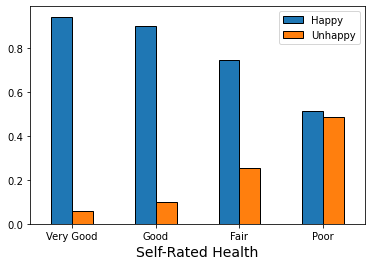

In [26]:
# happiness by health rating going from very good to poor (r = 0.38)
pd.crosstab(happy_correlates['v11'], happy_correlates['v10'], normalize = 'index').plot(kind = 'bar', edgecolor = 'black')
plt.xticks(range(4), ['Very Good', 'Good', 'Fair', 'Poor'], rotation = 0)
plt.xlabel('Self-Rated Health', fontsize=14)
plt.legend(labels = ['Happy', 'Unhappy']);

Here we see that happiness decreases (and unhappiness increases) as self-rated health deteriorates.

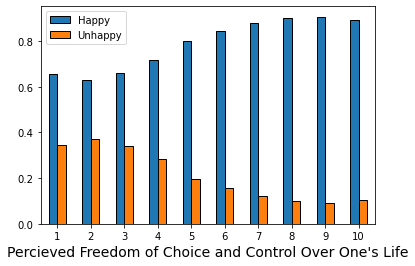

In [27]:
# happiness by perceived freedom of choice (r = -0.23)
pd.crosstab(happy_correlates['v55'], happy_correlates['v10'], normalize = 'index').plot(kind = 'bar', edgecolor = 'black')
plt.xticks(rotation = 0)
plt.xlabel("Percieved Freedom of Choice and Control Over One's Life", fontsize=14)
plt.legend(labels = ['Happy', 'Unhappy']);

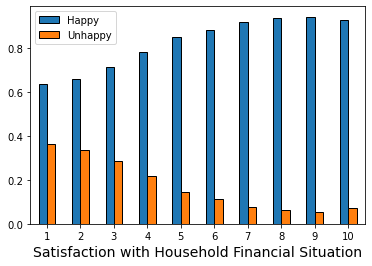

In [28]:
# happiness by satisfaction with household finances (r = -0.30)
pd.crosstab(happy_correlates['v59'], happy_correlates['v10'], normalize = 'index').plot(kind = 'bar', edgecolor = 'black')
plt.xticks(rotation = 0)
plt.xlabel("Satisfaction with Household Financial Situation", fontsize=14)
plt.legend(labels = ['Happy', 'Unhappy']);

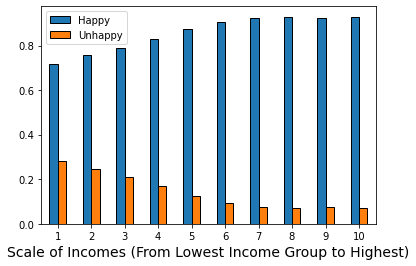

In [29]:
# happiness by satisfaction with household finances (r = -0.30)
pd.crosstab(happy_correlates['v239'], happy_correlates['v10'], normalize = 'index').plot(kind = 'bar', edgecolor = 'black')
plt.xticks(rotation = 0)
plt.xlabel("Scale of Incomes (From Lowest Income Group to Highest)", fontsize=14)
plt.legend(labels = ['Happy', 'Unhappy']);

As perceived freedom of choice increases, unhappiness decreases. However, happiness ratings start argubably high and stay high, almost regardless of perceptions of freedom of choice. The same pattern is evident for satisfaction with one's household financial situation _and_ people in different income groups. Overall these features shed light on what may influence unhappiness, but not necessarily what influences happiness.

**Logistic Regression Analyses**

In [30]:
#check shapes of X and y to make sure they are what scikit-learn wants
print(X.shape)
print(y.shape)

(82808, 268)
(82808,)


In [31]:
# for classification problems, you'll usually want to stratify based on the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321, stratify = y)

**Train a simple logistic regression model**

In [32]:
logistic_model = LogisticRegression(max_iter = 5000)
logistic_model.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(figsize = (42,30))
sns.barplot(x = logistic_model.coef_[0], y = list(X.columns), ax = ax, edgecolor = 'black')
plt.title('Logistic Regression Coefficients')

ymin, ymax = plt.ylim()
plt.vlines(x = 0, ymin = ymin, ymax = ymax);

**To Do:**
- Extract and sort coefficients to get top 20

In [ ]:
y_pred_prob = logistic_model.predict_proba(X_test)[:,1]

In [ ]:
# comparing true classes and predicted probability classes
print(metrics.roc_auc_score(y_test, y_pred_prob))

# simplest model ROC AUC score is 0.8289435975522034

In [ ]:
y_pred = logistic_model.predict(X_test)

In [ ]:
# check out more quality metrics
print(metrics.classification_report(y_test, y_pred))

Although this accuracy score is pretty high (87%), this model does an arguably poor job of accurately classifying unhappy respondents (only 67% of true positives in this category as indicated by the precision score). Similarly, the recall score (27%) indicates that this model misclassifies unhappy respondents as happy. There's definite room for improvement here.

F1 score: how do you balance correctly identifying unhappy people as unhappy while not accidentally pulling happy people in?

In [ ]:
fp_rate, tp_rate, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.figure(figsize = (14,12))

plt.plot(fp_rate, tp_rate)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Happiness Classifier', fontsize = 16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize = 14)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize = 14)
plt.grid(True)
plt.plot([0,1], [0,1]);

**Logistic regression model with feature scaling, transformations, and regularization**

In [ ]:
# # standardize feature value ranges
# X_columns = X.columns
# scaler = StandardScaler()
# X_std = scaler.fit_transform(X)
# X_std = pd.DataFrame(X_std, columns = X_columns)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321, stratify = y)

In [ ]:
# # calculate high skewness 
# skewness = X.skew(axis = 0).to_frame().reset_index()

# #rename columns
# skewness.columns=['variable','skewness_val']

# #identify variables with skewness greater than 1.5 and save them to a list
# high_skew = skewness[abs(skewness['skewness_val']) > 1.5].variable.tolist()
# print(high_skew)

In [ ]:
# # retain only variables that are not dummies
# high_skew = ['v4', 'v8', 'v102', 'v173', 'v174', 'v198', 'v199', 'v200', 'v202', 'v207', 'v208', 'v210', 'v211']

In [ ]:
# # Apply column transformer to variables that are highly skewed
# ct = ColumnTransformer(transformers = [
#     ('yeo-johnson', PowerTransformer(method = 'yeo-johnson', standardize = True), high_skew[1:]),
# ], remainder = 'passthrough')

In [ ]:
# pipe = Pipeline(steps = [
#     ('transform', ct),
#     ('logreg', LogisticRegression(penalty = 'elasticnet', 
#                                   #class_weight = 'balanced', 
#                                   solver = 'saga', 
#                                   max_iter = 5000, 
#                                   l1_ratio = 1)) # change from 0.5 to 1
# ])
# # when l1_ratio = .5, lasso and ridge penalty are both .5
# # when l1_ration = 1, this means full lasso penalty and no ridge penalty

In [ ]:
# model = pipe.fit(X_train, y_train)

In [ ]:
# fig, ax = plt.subplots(figsize = (42,30))
# sns.barplot(x = pipe.named_steps['logreg'].coef_[0], y = list(X.columns), ax = ax, edgecolor = 'black')
# plt.title('Logistic Regression with Coefficients (Version 2)')

# ymin, ymax = plt.ylim()
# plt.vlines(x = 0, ymin = ymin, ymax = ymax);

In [ ]:
# y_pred_prob = model.predict_proba(X_test)[:,1]

In [ ]:
# # comparing true classes and predicted probability classes
# print(metrics.roc_auc_score(y_test, y_pred_prob))

In [ ]:
# y_pred = logistic_model.predict(X_test)

In [ ]:
# # check out all quality metrics
# print(metrics.classification_report(y_test, y_pred))

In [ ]:
# coef_df = pd.DataFrame({'coefficient': pipe.named_steps['logreg'].coef_[0],
#                        'variable': X.columns})

In [ ]:
# coef_df.head()

In [ ]:
# coef_df.sort_values('coefficient')

In [ ]:
# happiness by number of children
pd.crosstab(X['v57_6'], y, normalize = 'index').plot(kind = 'bar', edgecolor = 'black')
#plt.xticks(range(4), ['Very Good', 'Good', 'Fair', 'Poor'], rotation = 0)
plt.xlabel('Marital Status - Single', fontsize=14)
plt.legend(labels = ['Happy', 'Unhappy']);

In [ ]:
pd.crosstab(X['v2_332'], y, normalize = 'index')

In [ ]:
# coef_df2 = pd.DataFrame({'coefficient': pipe.named_steps['logreg'].coef_[0],
#                        'variable': X.columns})

In [ ]:
# coef_df2.sort_values('coefficient')

Play around with class_weight options (on outcome variable)

In [ ]:
# fp_rate, tp_rate, thresholds = metrics.roc_curve(y_test, y_pred_prob)

# plt.figure(figsize = (14,12))

# plt.plot(fp_rate, tp_rate)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.title('ROC curve for Happiness Classifier', fontsize = 16)
# plt.xlabel('False Positive Rate (1 - Specificity)', fontsize = 14)
# plt.ylabel('True Positive Rate (Sensitivity)', fontsize = 14)
# plt.grid(True)
# plt.plot([0,1], [0,1]);

### Random Forest Algorithm

In [43]:
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestClassifier

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321, stratify = y)

In [54]:
# rf = RandomForestClassifier(class_weight = {0: 20, # 4x as much penalty for misclassifying unhappy respondents
#                                             1: 1},
#                             random_state = 321).fit(X_train, y_train)

In [64]:
rf = RandomForestClassifier(n_estimators = 250, # make 250 trees
                            max_depth = 3, # make more shallow trees
                            random_state = 321).fit(X_train, y_train)

In [65]:
y_pred = rf.predict(X_test)

In [66]:
y_pred_prob = rf.predict_proba(X_test)[:,1]

In [67]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7948341235321918


In [53]:
# class weights = 4 
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.08      0.15      3076
           1       0.86      1.00      0.92     17626

    accuracy                           0.86     20702
   macro avg       0.82      0.54      0.54     20702
weighted avg       0.85      0.86      0.81     20702



In [56]:
# class weights = 20 
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.08      0.14      3076
           1       0.86      1.00      0.92     17626

    accuracy                           0.86     20702
   macro avg       0.81      0.54      0.53     20702
weighted avg       0.85      0.86      0.81     20702



In [68]:
# n_estimators and max_depth 
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3076
           1       0.85      1.00      0.92     17626

    accuracy                           0.85     20702
   macro avg       0.43      0.50      0.46     20702
weighted avg       0.72      0.85      0.78     20702



C:\Users\ocnra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ocnra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ocnra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
coef_rf_df = pd.DataFrame({'importance': rf.feature_importances_,
                        'variable': X.columns})
coef_rf_df

,importance,variable
0,0.002349,v4
1,0.005787,v5
2,0.006074,v6
3,0.005407,v7
4,0.003921,v8
5,0.004022,v9
6,0.048505,v11
7,0.003146,v45
8,0.003664,v47
9,0.003382,v48


In [63]:
coef_rf_df.sort_values('importance', ascending = False)

,importance,variable
6,0.048505,v11
18,0.037824,v59
15,0.020492,v55
110,0.017227,v239
111,0.016649,v242
16,0.013319,v56
87,0.012032,v191
91,0.009398,v195
38,0.009230,v101
35,0.009187,v98


In [ ]:
# try extra trees regressor and/or gradient boosting to see if either performs better